# 따릉이 대여량 예측 경진대회

이번 대회에서 주어진 데이터는 기상자료 개방포털의 단기예측 데이터와 예측일의 따릉이 대여 수 입니다.

쉽게말해 오늘 발표된 "내일의 날씨" 예보를 보고, 내일 사람들이 따릉이를 얼마나 대여할 지 예측하는 문제입니다.

자, 시작해 볼까요?

## 데이터 불러오기

우선 학습에 필요한 train데이터를 불러오겠습니다.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

bicycle = pd.read_csv('data/train.csv')
bicycle.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


지난번 데이콘 베이직 iris데이터는 학습에 알맞도록 잘 정제되어있는 데이터였는데요

이번 데이터는 기상자료 개방 포털의 자료와 서울 열린 데이터 광장에서 수집한 정제되지 않은 데이터입니다.

즉, 모든 데이터 셀이 채워져 있다고 가정할 수 없으며 때때로 '빈칸'이 존재할 수 있습니다.

빈칸이 있나 확인해보겠습니다!

In [2]:
def check_missing_col(dataframe):
    counted_missing_col = 0
    for i, col in enumerate(bicycle.columns):
        missing_values = sum(bicycle[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.')

        if i == len(bicycle.columns) - 1 and counted_missing_col == 0:
            print('결측치가 존재하지 않습니다')

check_missing_col(bicycle)

결측치가 존재하지 않습니다


운이 좋군요!

주어진 데이터에는 결측치가 존재하지 않습니다.

다음 단계로 진행해볼까요?

## 일자 분리

모델에 수치를 넣고 학습시키기 위해선 글자나 문자를 숫자로 바꿔주는 작업이 필요합니다.

주어진 데이터를 살펴보면 date_time부분이 문자열(string)로 되어있는 것을 확인하실 수 있습니다.

이를 각각 년도, 월, 일로 나누어 숫자형으로 변환해 보겠습니다.

In [3]:
def seperate_datetime(dataframe):
    year = []
    month = []
    day = []

    for date in dataframe.date_time:
        year_point, month_point, day_point = date.split('-') # - 기준으로 string을 나누고 list로 만듦 ex) '2016-04-01' -> ['2016', '04', '01']
        year.append(int(year_point))
        month.append(int(month_point))
        day.append(int(day_point))
    return year, month, day

year, month, day = seperate_datetime(bicycle)
    
bicycle['year'] = year
bicycle['month'] = month
bicycle['day'] = day

bicycle.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5


년도, 월, 일이 전부 잘 분리되어 들어간게 보이시나요?

이제 학습에 필요한 X와 y를 분리해 보겠습니다

## 변수 및 모델 정의

우리의 목적은 주어진 날씨 데이터(low_temp, high_temp, precipitaion, wind_speed, humidity, insolation, cloud, year, month, day)를 이용하여 사람들이 따릉이를 얼마나 빌리는지(number_of_rentals) 예측하는 것입니다.

그럼 날씨 데이터가 X, 따릉이 대여 수가 y가 되겠죠?

In [4]:
X = bicycle.drop(['date_time', 'number_of_rentals'], axis=1)
y = bicycle.number_of_rentals

단순한 선형회귀 모델로 문제를 해결해보도록 하겠습니다.

sklearn에서 제공하는 선형회귀 모델을 사용할게요.

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # 모델 정의
model.fit(X, y) # 학습

LinearRegression()

굉장히 간단하게 학습이 끝났습니다.

모델이 실제로 데이터를 얼마나 잘 맞추는지 확인해볼까요?

In [6]:
y_hat = model.predict(X) # y 예측

In [7]:
nmae = np.mean(abs(y_hat - y) / y) # nmae 계산

print(f'모델 NMAE: {nmae}')

모델 NMAE: 0.3234797521201359


NMAE로 계산하여 0.32가 나왔습니다.

좋은 수치일까요 나쁜 수치일까요?

NMAE 0.32는 대략 예측치와 실제값이 32% 정도의 오차율을 보인다는 것을 의미합니다.

어떠신가요 여러분은 만족하시나요?

## 예측값 눈으로 확인하기

0.32라는 숫자만 봐서는 모델이 어떤방식으로 맞췄는지 어디에서 오차가 더 많이 나는지 알 수 없습니다.

모델을 개선시키기 위해선 어느 포인트에서 예측을 하지 못했는지 모델의 약점을 알아야합니다.

그러기 위한 방법중 하나가 바로 오답노트인데요

여러분은 데이콘 제출페이지에 제출하는 방식으로 스코어를 확인할수도, train set의 정확도가 어느정도 나오는지 눈으로 확인할 수도 있습니다.

train set에서 오답노트를 확인하는것은 자칫 overfitting시킬 수 있어 조심해야하는 부분이지만 여러분에게 어느정도 인사이트를 줄 수도 있을겁니다.

그럼 plot을 그려서 확인해 보겠습니다.

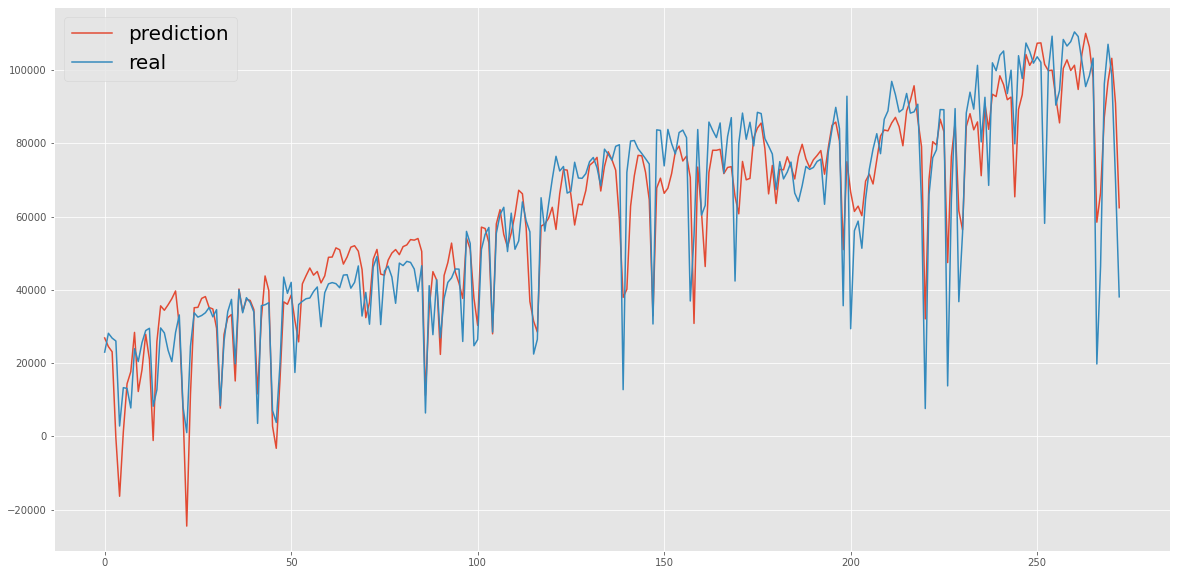

In [8]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.plot(y_hat, label = 'prediction')
plt.plot(y, label = 'real')
plt.legend(fontsize = 20)
plt.show()

파란선이 실제 따릉이 대여량, 붉은 선이 우리의 모델이 예측한 값입니다.

여러분이 보기에는 어떠신가요?

우리의 모델이 어느정도 예측을 하고 있는것같나요?

'추세는 따라가고 있는것 같다'정도는 이야기할 수 있을것 같습니다.

## 제출

이제 제출을 해보겠습니다.

주어진 test데이터로 예측을 진행한 다음 sample_submission.csv에 날짜별로 예측한 값을 넣어보겠습니다.

In [9]:
test = pd.read_csv('data/test.csv') # 데이터를 불러온 뒤
submission  = pd.read_csv('data/sample_submission.csv')

check_missing_col(test) # 결측치 확인

year, month, day = seperate_datetime(test) #날짜 숫자로 분리 후 

#새로운 컬럼을 생성
test['year'] = year 
test['month'] = month
test['day'] = day

test.head()

결측치가 존재하지 않습니다


,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,day
0,2021-04-01,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333,2021,4,1
1,2021-04-02,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500,2021,4,2
2,2021-04-03,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847,2021,4,3
3,2021-04-04,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671,2021,4,4
4,2021-04-05,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459,2021,4,5


위에서 학습시킨 모델을 사용해서 예측을 진행합니다.

In [10]:
# 문자열인 date_time 컬럼 drop
test_X = test.drop('date_time', axis = 1)

# train data로 학습시킨 모델에 test_X데이터를 넣고 예측
test_yhat = model.predict(test_X)

# submission dataFrame 완성
submission['number_of_rentals'] = test_yhat

# 제출 파일 생성
submission.to_csv('sample_submission.csv', index= False)

이제 여러분의 제출 파일이 생성되었습니다.

결과물을 제출하고 여러분의 점수를 확인해보세요!